In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
df = pd.read_csv("/content/sales.csv", 
                 parse_dates=["Month"], 
                 index_col=["Month"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Sales
Month,
2015-01-01,266.0
2015-02-01,145.9
2015-03-01,183.1
2015-04-01,119.3
2015-05-01,180.3


In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

In [ ]:
from threading import Barrier


import pandas as pd
import tensorflow as tf


def normalize_series(data, min, max):
    data = data - min
    data = data / max
    return data

def windowed_dataset(series, batch_size, n_past=10, n_future=10, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    return ds.batch(batch_size).prefetch(1)

def solution_model():
    # DO NOT CHANGE THIS CODE
    # Reads the dataset.
    df = pd.read_csv('sales.csv',
                     infer_datetime_format=True, index_col='Month', header=0)

    # Number of features in the dataset. We use all features as predictors to
    # predict all features of future time steps.
    N_FEATURES = len(df.columns) # DO NOT CHANGE THIS

    # Normalizes the data
    data = df.values
    data = normalize_series(data, data.min(axis=0), data.max(axis=0))

    # Splits the data into training and validation sets.
    SPLIT_TIME = int(len(data) * 0.8) # DO NOT CHANGE THIS
    x_train = data[:SPLIT_TIME]
    x_valid = data[SPLIT_TIME:]

    # DO NOT CHANGE THIS CODE



    BATCH_SIZE = 32  # ADVISED NOT TO CHANGE THIS

    N_PAST = 10  # DO NOT CHANGE THIS

    # Number of future time steps which are to be predicted.
    N_FUTURE = 10  # DO NOT CHANGE THIS

    SHIFT = 1  # DO NOT CHANGE THIS

    # Code to create windowed train and validation datasets.
    train_set = windowed_dataset(series=x_train, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)
    valid_set = windowed_dataset(series=x_valid, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)

    # Code to define your model.

    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(16, return_sequences=True,activation='elu', input_shape=(N_PAST, N_FEATURES)),
        tf.keras.layers.LSTM(32, activation='elu', return_sequences=True),
        tf.keras.layers.SimpleRNN(32, activation='elu',return_sequences=True ),
        tf.keras.layers.GRU(64, activation='relu'),
        tf.keras.layers.Dense(N_FEATURES)
    ])
    

   

    optimizer = 'rmsprop'
    model.compile(
        loss="huber",
        optimizer=optimizer,
        metrics=["mae"]
    
    )

    history=model.fit(
        train_set, validation_data=valid_set,validation_steps=1, epochs=50,
          batch_size = BATCH_SIZE)

    return model, history

model, history = solution_model()

Epoch 1/50
      1/Unknown - 5s 5s/step - loss: 0.0349 - mae: 0.2403WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1 batches). You may need to use the repeat() function when building your dataset.
1/1 [==============================] - 6s 6s/step - loss: 0.0349 - mae: 0.2403
Epoch 2/50
1/1 [==============================] - 0s 46ms/step - loss: 0.0305 - mae: 0.2217
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 0.0195 - mae: 0.1667
Epoch 4/50
1/1 [==============================] - 0s 44ms/step - loss: 0.0105 - mae: 0.1144
Epoch 5/50
1/1 [==============================] - 0s 41ms/step - loss: 0.0059 - mae: 0.0841
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 0.0059 - mae: 0.0833
Epoch 7/50
1/1 [==============================] - 0s 44ms/step - loss: 0.0059 - mae: 0.0843
Epoch 8/50
1/1 [====================

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_preds = make_preds(model, test_windows)
len(model_preds), model_1_preds[:10]

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  #val_loss = history.history['val_loss']

  mae = history.history['mae']
  #val_mae = history.history['val_mae']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  #plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot mae
  plt.figure()
  plt.plot(epochs, mae, label='training_mae')
  #plt.plot(epochs, val_mae, label='val_mae')
  plt.title('Mae')
  plt.xlabel('Epochs')
  plt.legend();

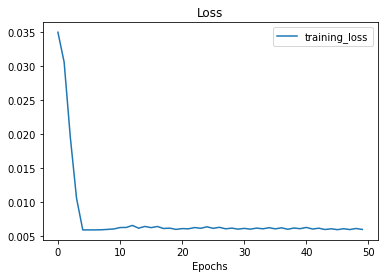

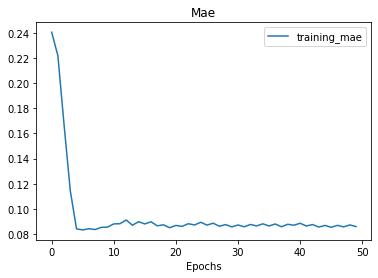

In [ ]:
plot_loss_curves(history)

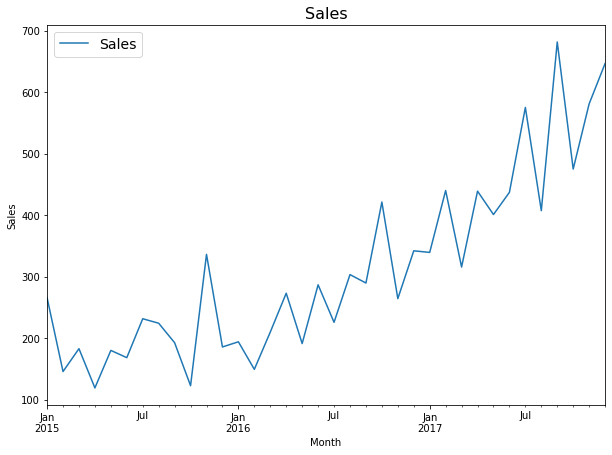

In [ ]:
import matplotlib.pyplot as plt
df.plot(figsize=(10, 7))
plt.ylabel("Sales")
plt.title("Sales", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
##################3

In [ ]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/sales.csv", 
                 parse_dates=["Month"], 
                 index_col=["Month"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Sales
Month,
2015-01-01,266.0
2015-02-01,145.9
2015-03-01,183.1
2015-04-01,119.3
2015-05-01,180.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2015-01-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [ ]:
len(df)

36

In [ ]:
sales = pd.DataFrame(df)
sales.head()

,Sales
Month,
2015-01-01,266.0
2015-02-01,145.9
2015-03-01,183.1
2015-04-01,119.3
2015-05-01,180.3


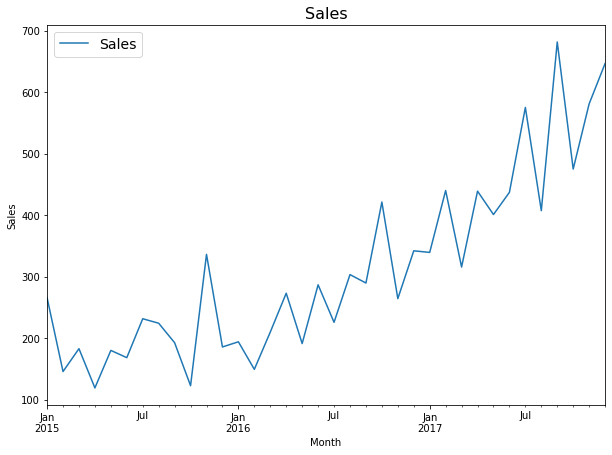

In [ ]:
import matplotlib.pyplot as plt
df.plot(figsize=(10, 7))
plt.ylabel("Sales")
plt.title("Sales", fontsize=16)
plt.legend(fontsize=14);

In [ ]:

timesteps = df.index.to_numpy()
sales = df["Sales"].to_numpy()

timesteps[:10], sales[:10]

(array(['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
        '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
        '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
        '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
        '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
        122.9]))

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(sales)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], sales[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], sales[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(28, 8, 28, 8)

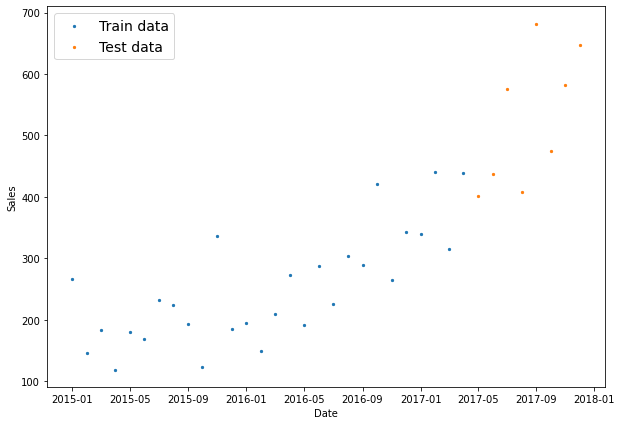

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Sales")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

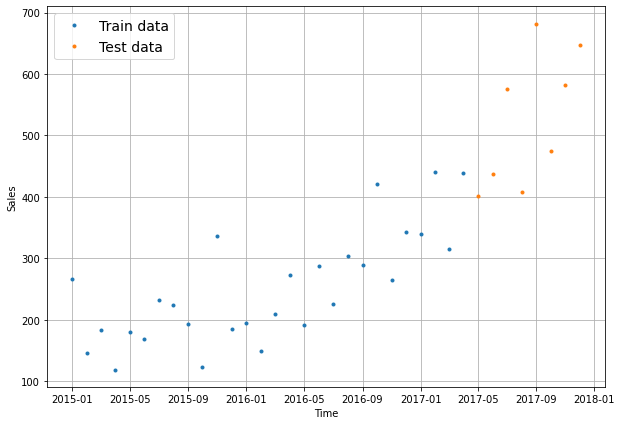

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3]),
 array([401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3]))

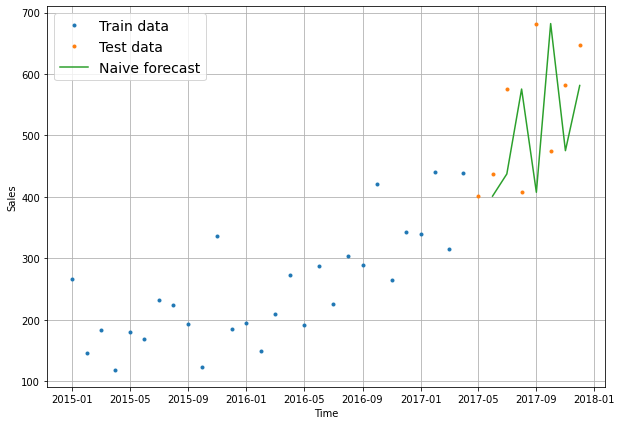

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(sales, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(29, 29)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [266.  145.9 183.1 119.3 180.3 168.5 231.8] -> Label: [224.5]
Window: [145.9 183.1 119.3 180.3 168.5 231.8 224.5] -> Label: [192.8]
Window: [183.1 119.3 180.3 168.5 231.8 224.5 192.8] -> Label: [122.9]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [315.9 439.3 401.3 437.4 575.5 407.6 682. ] -> Label: [475.3]
Window: [439.3 401.3 437.4 575.5 407.6 682.  475.3] -> Label: [581.3]
Window: [401.3 437.4 575.5 407.6 682.  475.3 581.3] -> Label: [646.9]


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(23, 6, 23, 6)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8],
        [145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5],
        [183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8],
        [119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9],
        [180.3, 168.5, 231.8, 224.5, 192.8, 122.9, 336.5]]), array([[224.5],
        [192.8],
        [122.9],
        [336.5],
        [185.9]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 187.1362 - mae: 187.1362 - val_loss: 356.9047 - val_mae: 356.9047
Epoch 2/100
1/1 [==============================] - 0s 498ms/step - loss: 172.6302 - mae: 172.6302 - val_loss: 330.9390 - val_mae: 330.9390
Epoch 3/100
1/1 [==============================] - 1s 511ms/step - loss: 158.0794 - mae: 158.0794 - val_loss: 304.9316 - val_mae: 304.9316
Epoch 4/100
1/1 [==============================] - 1s 506ms/step - loss: 143.4659 - mae: 143.4659 - val_loss: 278.8706 - val_mae: 278.8706
Epoch 5/100
1/1 [==============================] - 1s 501ms/step - loss: 129.0161 - mae: 129.0161 - val_loss: 252.7046 - val_mae: 252.7046
Epoch 6/100
1/1 [==============================] - 0s 487ms/step - loss: 115.3831 - mae: 115.3831 - val_loss: 225.9748 - val_mae: 225.9748
Epoch 7/100
1/1 [==============================] - 1s 515ms/step - loss: 102.4167 - mae: 102.4167 - val_loss: 199.3049 - val_mae: 199.3049
Epoch 8/100
1/1 [=============

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 23ms/step - loss: 89.1780 - mae: 89.1780


[89.1779556274414, 89.1779556274414]

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(6, <tf.Tensor: shape=(6,), dtype=float32, numpy=
 array([416.40817, 453.16907, 536.4309 , 459.60092, 627.9602 , 524.4216 ],
       dtype=float32)>)

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 7 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(sales, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(29, 29)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(23, 6, 23, 6)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

In [ ]:
# tf.random.set_seed(42)

# inputs = layers.Input(shape=(WINDOW_SIZE))
# x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
# # print(x.shape)
# x = layers.Bidirectional(LSTM(64, activation="relu", return_sequences=True))(x)
# x = layers.Bidirectional(LSTM(128, activation="relu"))(x) 
# # print(x.shape)
# x = layers.Dense(32, activation="relu")(x)
# output = layers.Dense(HORIZON)(x)
# model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# # Compile model
# model_2.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())


# model_2.fit(train_windows,
#             train_labels,
#             epochs=20,
#             batch_size=128,
#             validation_data=(test_windows, test_labels),
#             callbacks=[create_model_checkpoint(model_name=model_2.name)])

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_2 = tf.keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(32, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  #layers.GaussianNoise(0.6),
  #layers.Dense(128, activation='relu'),
  layers.Dense(HORIZON, activation="relu") # linear activation is the same as having no activation                        
], name="model_2_dense") # give the model a name so we can save it

# Compile model
optimizer = 'rmsprop'
model_2.compile(loss="huber",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 


# Fit model
model_2.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 222.2448 - mae: 222.7448INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 3s 3s/step - loss: 222.2448 - mae: 222.7448 - val_loss: 424.8860 - val_mae: 425.3860
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 214.6814 - mae: 215.1814INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 2s 2s/step - loss: 214.6814 - mae: 215.1814 - val_loss: 401.4157 - val_mae: 401.9157
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 194.9188 - mae: 195.4188INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 1s/step - loss: 194.9188 - mae: 195.4188 - val_loss: 377.4644 - val_mae: 377.9644
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 178.1712 - mae: 178.6712INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 854ms/step - loss: 178.1712 - mae: 178.6712 - val_loss: 352.5040 - val_mae: 353.0040
Epoch 5/200
1/1 [==============================] - ETA: 0s - loss: 178.9437 - mae: 179.4437INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 850ms/step - loss: 178.9437 - mae: 179.4437 - val_loss: 326.8222 - val_mae: 327.3222
Epoch 6/200
1/1 [==============================] - ETA: 0s - loss: 152.7098 - mae: 153.2098INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 847ms/step - loss: 152.7098 - mae: 153.2098 - val_loss: 300.2812 - val_mae: 300.7812
Epoch 7/200
1/1 [==============================] - ETA: 0s - loss: 140.2007 - mae: 140.7007INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 868ms/step - loss: 140.2007 - mae: 140.7007 - val_loss: 273.1070 - val_mae: 273.6070
Epoch 8/200
1/1 [==============================] - ETA: 0s - loss: 124.2705 - mae: 124.7705INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 862ms/step - loss: 124.2705 - mae: 124.7705 - val_loss: 244.9643 - val_mae: 245.4643
Epoch 9/200
1/1 [==============================] - ETA: 0s - loss: 116.6414 - mae: 117.1414INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 874ms/step - loss: 116.6414 - mae: 117.1414 - val_loss: 215.7492 - val_mae: 216.2492
Epoch 10/200
1/1 [==============================] - ETA: 0s - loss: 95.5691 - mae: 96.0691INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 858ms/step - loss: 95.5691 - mae: 96.0691 - val_loss: 186.1819 - val_mae: 186.6819
Epoch 11/200
1/1 [==============================] - ETA: 0s - loss: 94.8811 - mae: 95.3811INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 842ms/step - loss: 94.8811 - mae: 95.3811 - val_loss: 156.5235 - val_mae: 157.0235
Epoch 12/200
1/1 [==============================] - ETA: 0s - loss: 76.3076 - mae: 76.8076INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 850ms/step - loss: 76.3076 - mae: 76.8076 - val_loss: 129.9564 - val_mae: 130.4564
Epoch 13/200
1/1 [==============================] - ETA: 0s - loss: 62.7159 - mae: 63.2159INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 834ms/step - loss: 62.7159 - mae: 63.2159 - val_loss: 118.9265 - val_mae: 119.4265
Epoch 14/200
1/1 [==============================] - ETA: 0s - loss: 61.2796 - mae: 61.7682INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 836ms/step - loss: 61.2796 - mae: 61.7682 - val_loss: 109.6781 - val_mae: 110.1781
Epoch 15/200
1/1 [==============================] - ETA: 0s - loss: 61.4677 - mae: 61.9677INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 867ms/step - loss: 61.4677 - mae: 61.9677 - val_loss: 101.7003 - val_mae: 102.2003
Epoch 16/200
1/1 [==============================] - ETA: 0s - loss: 80.4972 - mae: 80.9972INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 874ms/step - loss: 80.4972 - mae: 80.9972 - val_loss: 94.9139 - val_mae: 95.4139
Epoch 17/200
1/1 [==============================] - ETA: 0s - loss: 76.5112 - mae: 77.0112INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 864ms/step - loss: 76.5112 - mae: 77.0112 - val_loss: 93.3287 - val_mae: 93.8287
Epoch 18/200
1/1 [==============================] - 0s 34ms/step - loss: 64.6179 - mae: 65.1179 - val_loss: 94.1434 - val_mae: 94.6434
Epoch 19/200
1/1 [==============================] - 0s 35ms/step - loss: 62.8561 - mae: 63.3561 - val_loss: 96.8425 - val_mae: 97.3425
Epoch 20/200
1/1 [==============================] - 0s 36ms/step - loss: 70.2562 - mae: 70.7562 - val_loss: 98.8031 - val_mae: 99.3031
Epoch 21/200
1/1 [==============================] - 0s 33ms/step - loss: 62.2354 - mae: 62.7354 - val_loss: 99.2111 - val_mae: 99.7111
Epoch 22/200
1/1 [==============================] - 0s 32ms/step - loss: 60.2933 - mae: 60.7933 - val_loss: 98.9409 - val_mae: 99.4409
Epoch 23/200
1/1 [==============================] - 0s 36ms/step - loss: 73.2551 - mae: 73.7551 - val_loss: 97.2318 - val_mae: 97.7318
Epoch 24/200
1/1 [==============================] - 0s 36ms/step - 

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 856ms/step - loss: 57.2393 - mae: 57.7382 - val_loss: 93.0360 - val_mae: 93.5360
Epoch 26/200
1/1 [==============================] - ETA: 0s - loss: 80.6267 - mae: 81.1267INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 858ms/step - loss: 80.6267 - mae: 81.1267 - val_loss: 91.9931 - val_mae: 92.4931
Epoch 27/200
1/1 [==============================] - ETA: 0s - loss: 58.7696 - mae: 59.2696INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 839ms/step - loss: 58.7696 - mae: 59.2696 - val_loss: 91.4257 - val_mae: 91.9257
Epoch 28/200
1/1 [==============================] - 0s 35ms/step - loss: 54.3263 - mae: 54.8263 - val_loss: 94.5456 - val_mae: 95.0456
Epoch 29/200
1/1 [==============================] - 0s 33ms/step - loss: 58.9068 - mae: 59.4068 - val_loss: 97.3708 - val_mae: 97.8708
Epoch 30/200
1/1 [==============================] - 0s 42ms/step - loss: 55.1862 - mae: 55.6862 - val_loss: 99.9187 - val_mae: 100.4187
Epoch 31/200
1/1 [==============================] - 0s 39ms/step - loss: 53.5151 - mae: 54.0140 - val_loss: 102.4844 - val_mae: 102.9844
Epoch 32/200
1/1 [==============================] - 0s 33ms/step - loss: 63.5139 - mae: 64.0139 - val_loss: 105.1012 - val_mae: 105.6012
Epoch 33/200
1/1 [==============================] - 0s 35ms/step - loss: 80.4244 - mae: 80.9244 - val_loss: 107.5303 - val_mae: 108.0303
Epoch 34/200
1/1 [==============================] - 0s 38ms/

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 1s/step - loss: 53.4426 - mae: 53.9426 - val_loss: 89.7107 - val_mae: 90.2107
Epoch 50/200
1/1 [==============================] - ETA: 0s - loss: 54.4020 - mae: 54.9017INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 874ms/step - loss: 54.4020 - mae: 54.9017 - val_loss: 87.2562 - val_mae: 87.7559
Epoch 51/200
1/1 [==============================] - 0s 33ms/step - loss: 53.1635 - mae: 53.6617 - val_loss: 87.3061 - val_mae: 87.8061
Epoch 52/200
1/1 [==============================] - 0s 38ms/step - loss: 57.8591 - mae: 58.3591 - val_loss: 87.5775 - val_mae: 88.0775
Epoch 53/200
1/1 [==============================] - 0s 33ms/step - loss: 63.7773 - mae: 64.2773 - val_loss: 87.7433 - val_mae: 88.2433
Epoch 54/200
1/1 [==============================] - 0s 32ms/step - loss: 54.4762 - mae: 54.9762 - val_loss: 87.8516 - val_mae: 88.3516
Epoch 55/200
1/1 [==============================] - 0s 35ms/step - loss: 64.5234 - mae: 65.0234 - val_loss: 87.8273 - val_mae: 88.3273
Epoch 56/200
1/1 [==============================] - 0s 35ms/step - loss: 57.0086 - mae: 57.5086 - val_loss: 87.7924 - val_mae: 88.2924
Epoch 57/200
1/1 [==============================] - 0s 35ms/step - 

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 852ms/step - loss: 40.1555 - mae: 40.6555 - val_loss: 86.9281 - val_mae: 87.4281
Epoch 169/200
1/1 [==============================] - ETA: 0s - loss: 52.5236 - mae: 53.0236INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 884ms/step - loss: 52.5236 - mae: 53.0236 - val_loss: 86.5148 - val_mae: 87.0148
Epoch 170/200
1/1 [==============================] - ETA: 0s - loss: 54.3935 - mae: 54.8935INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 859ms/step - loss: 54.3935 - mae: 54.8935 - val_loss: 86.0698 - val_mae: 86.5698
Epoch 171/200
1/1 [==============================] - ETA: 0s - loss: 53.9292 - mae: 54.4292INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 874ms/step - loss: 53.9292 - mae: 54.4292 - val_loss: 85.8248 - val_mae: 86.2813
Epoch 172/200
1/1 [==============================] - 0s 40ms/step - loss: 47.0868 - mae: 47.5868 - val_loss: 86.6159 - val_mae: 87.1159
Epoch 173/200
1/1 [==============================] - 0s 33ms/step - loss: 34.0574 - mae: 34.5574 - val_loss: 86.5117 - val_mae: 87.0117
Epoch 174/200
1/1 [==============================] - ETA: 0s - loss: 54.1799 - mae: 54.6799INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 859ms/step - loss: 54.1799 - mae: 54.6799 - val_loss: 85.6507 - val_mae: 86.1132
Epoch 175/200
1/1 [==============================] - ETA: 0s - loss: 45.1078 - mae: 45.6078INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 868ms/step - loss: 45.1078 - mae: 45.6078 - val_loss: 85.4637 - val_mae: 85.9637
Epoch 176/200
1/1 [==============================] - 0s 35ms/step - loss: 49.4339 - mae: 49.9339 - val_loss: 85.4695 - val_mae: 85.9695
Epoch 177/200
1/1 [==============================] - 0s 33ms/step - loss: 36.6733 - mae: 37.1733 - val_loss: 85.5040 - val_mae: 86.0040
Epoch 178/200
1/1 [==============================] - 0s 35ms/step - loss: 37.4382 - mae: 37.9382 - val_loss: 85.4846 - val_mae: 85.9846
Epoch 179/200
1/1 [==============================] - ETA: 0s - loss: 51.5868 - mae: 52.0868INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


1/1 [==============================] - 1s 851ms/step - loss: 51.5868 - mae: 52.0868 - val_loss: 85.4407 - val_mae: 85.9407
Epoch 180/200
1/1 [==============================] - 0s 39ms/step - loss: 49.0719 - mae: 49.5719 - val_loss: 85.4515 - val_mae: 85.9515
Epoch 181/200
1/1 [==============================] - 0s 42ms/step - loss: 51.4036 - mae: 51.8864 - val_loss: 85.5726 - val_mae: 86.0726
Epoch 182/200
1/1 [==============================] - 0s 34ms/step - loss: 40.8946 - mae: 41.3825 - val_loss: 85.6417 - val_mae: 86.1417
Epoch 183/200
1/1 [==============================] - 0s 37ms/step - loss: 46.5195 - mae: 47.0195 - val_loss: 85.7057 - val_mae: 86.2057
Epoch 184/200
1/1 [==============================] - 0s 38ms/step - loss: 42.7723 - mae: 43.2723 - val_loss: 85.9092 - val_mae: 86.4092
Epoch 185/200
1/1 [==============================] - 0s 38ms/step - loss: 49.6023 - mae: 50.1023 - val_loss: 86.1465 - val_mae: 86.6465
Epoch 186/200
1/1 [==============================] - 0s 36ms/

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 21ms/step - loss: 87.6249 - mae: 88.1249


[87.62493896484375, 88.12493896484375]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 88.12494,
 'mape': 14.600102,
 'mase': 0.5369543,
 'mse': 13463.837,
 'rmse': 116.033775}

In [ ]:
INTO_FUTURE = 1

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [ ]:
y_all = df["Sales"].to_numpy()

In [ ]:
WINDOW_SIZE

7

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_2,
                                       into_future=INTO_FUTURE,
                                       window_size=30)

Predicting on: 
 [437.4 575.5 407.6 682.  475.3 581.3 646.9] -> Prediction: 684.1985473632812



In [ ]:
model_2.save('sales.h5')